<a href="https://colab.research.google.com/github/vijaykalmani/COVID-19-Data-Analysis/blob/main/Covid_19_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Covid_19_Data

/content/drive/MyDrive/Covid_19_Data


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Covid_19_Data/"

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
df.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat",
                  "Long":"long","Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered"},inplace=True)

In [ ]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df["active"]=df["confirmed"]-df["deaths"]-df["recovered"]

In [ ]:
df.iloc[100:,:]

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
100,NaN,Estonia,58.595300,25.013600,2020-01-22,0,0,0,0,Europe,0
101,NaN,Eswatini,-26.522500,31.465900,2020-01-22,0,0,0,0,Africa,0
102,NaN,Ethiopia,9.145000,40.489700,2020-01-22,0,0,0,0,Africa,0
103,NaN,Fiji,-17.713400,178.065000,2020-01-22,0,0,0,0,Western Pacific,0
104,NaN,Finland,61.924110,25.748151,2020-01-22,0,0,0,0,Europe,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [ ]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147


In [ ]:
top=df[df["date"]==df["date"].max()]

In [ ]:
top.tail()

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa,117
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean,375
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa,19
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe,1147
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa,365


In [ ]:
world=top.groupby("country")["confirmed","active","deaths","date"].sum().reset_index()

In [ ]:
world.head(67)


,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
62,Gabon,7189,2458,49
63,Gambia,326,252,8
64,Georgia,1137,199,16
65,Germany,207112,7673,9125


In [ ]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    187 non-null    object
 1   confirmed  187 non-null    int64 
 2   active     187 non-null    int64 
 3   deaths     187 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.0+ KB


In [ ]:
#Choropleth
figure=px.choropleth(world,locations="country",locationmode="country names",color="active",hover_name="country"
                ,range_color=[1,1000],color_continuous_scale="greens",title="Contries with active cases")
figure.show()

In [ ]:
#determining total confirmed cases grouped by date
total_cases=df.groupby("date")["date","confirmed"].sum().reset_index()
total_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

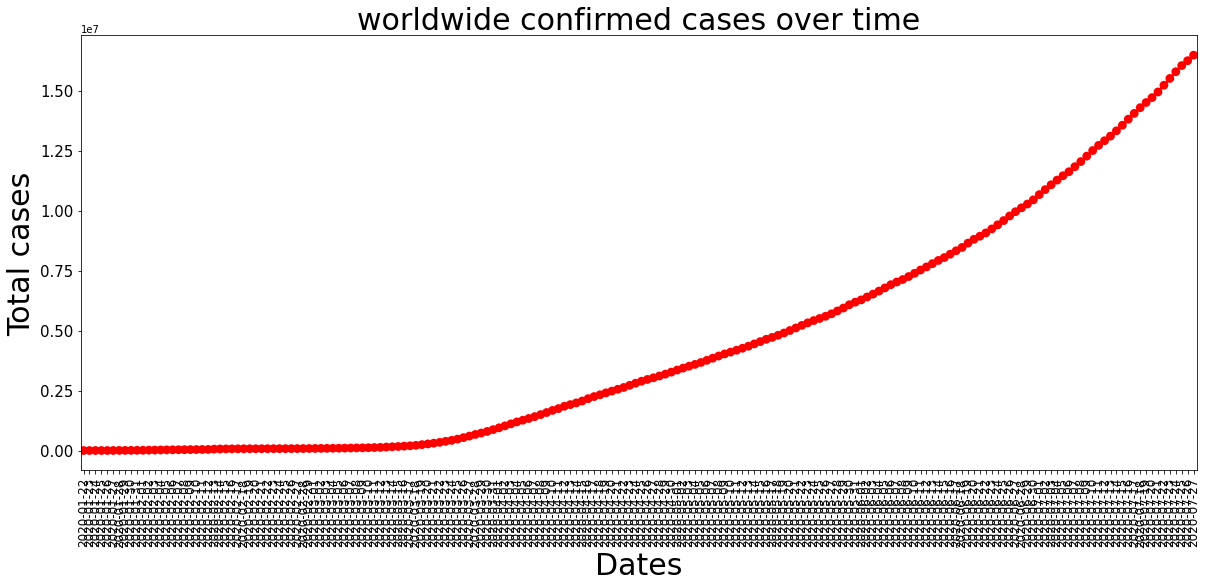

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("total cases",fontsize=30)
plt.title("worldwide confirmed cases over time",fontsize=30)

ax=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color="r")
ax.set(xlabel="Dates",ylabel="Total cases")

In [ ]:
total_cases.date.dt.date

0      2020-01-22
1      2020-01-23
2      2020-01-24
3      2020-01-25
4      2020-01-26
          ...    
183    2020-07-23
184    2020-07-24
185    2020-07-25
186    2020-07-26
187    2020-07-27
Name: date, Length: 188, dtype: object

In [ ]:
total_cases.confirmed

0           555
1           654
2           941
3          1434
4          2118
         ...   
183    15510481
184    15791645
185    16047190
186    16251796
187    16480485
Name: confirmed, Length: 188, dtype: int64

In [ ]:
#current top countries having most active cases
top_actives=top.groupby("country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


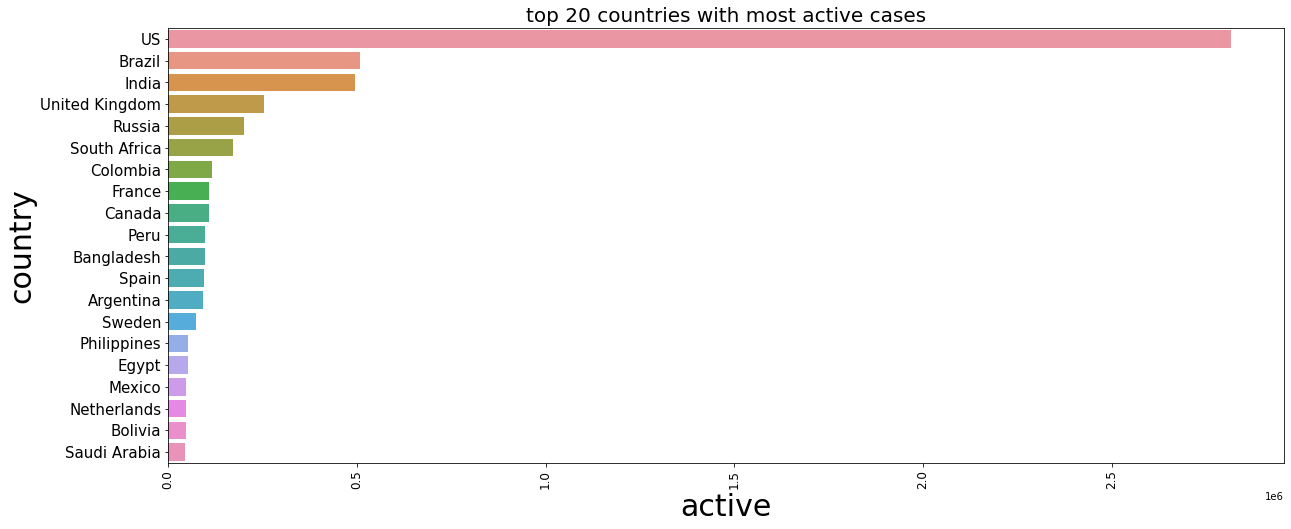

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("active",fontsize=30)
plt.ylabel("country",fontsize=30)
plt.title("top 20 countries with most active cases",fontsize=20)

ax=sns.barplot(x=top_actives.active,y=top_actives.country)


In [ ]:
#Data of China
china=df[df.country=="China"]
china

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific,1
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific,14
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific,6
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific,1
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific,0
...,...,...,...,...,...,...,...,...,...,...,...
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific,6
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific,0
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific,235
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific,2


In [ ]:
china=china.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
china

,date,recovered,deaths,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970
...,...,...,...,...,...
183,2020-07-23,78701,4649,86045,2695
184,2020-07-24,78745,4650,86202,2807
185,2020-07-25,78813,4652,86381,2916
186,2020-07-26,78862,4652,86570,3056


In [ ]:
#data of US
us=df[df.country=="US"]
us

,state,country,lat,long,date,confirmed,deaths,recovered,Active,WHO Region,active
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas,1
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas,1
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas,2
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas,2
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas,5
...,...,...,...,...,...,...,...,...,...,...,...
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas,2661117
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas,2705347
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas,2753091
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas,2789125


In [ ]:
us=us.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [ ]:
us=us.iloc[33:].reset_index().drop("index",axis=1)
us

,date,recovered,deaths,confirmed,active
0,2020-02-24,5,0,15,10
1,2020-02-25,6,0,15,9
2,2020-02-26,6,0,15,9
3,2020-02-27,6,0,16,10
4,2020-02-28,7,0,16,9
...,...,...,...,...,...
150,2020-07-23,1233269,144430,4038816,2661117
151,2020-07-24,1261624,145560,4112531,2705347
152,2020-07-25,1279414,146465,4178970,2753091
153,2020-07-26,1297863,146935,4233923,2789125


In [ ]:
us.iloc[25:]

,date,recovered,deaths,confirmed,active
25,2020-03-20,147,362,19479,18970
26,2020-03-21,176,456,25825,25193
27,2020-03-22,178,601,33761,32982
28,2020-03-23,178,784,43850,42888
29,2020-03-24,348,1021,54112,52743
...,...,...,...,...,...
150,2020-07-23,1233269,144430,4038816,2661117
151,2020-07-24,1261624,145560,4112531,2705347
152,2020-07-25,1279414,146465,4178970,2753091
153,2020-07-26,1297863,146935,4233923,2789125


In [ ]:
#data for italy
italy=df[df.country=="Italy"]
italy=italy.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
italy=italy.iloc[9:].reset_index().drop("index",axis=1)
italy


,date,recovered,deaths,confirmed,active
0,2020-01-31,0,0,2,2
1,2020-02-01,0,0,2,2
2,2020-02-02,0,0,2,2
3,2020-02-03,0,0,2,2
4,2020-02-04,0,0,2,2
...,...,...,...,...,...
174,2020-07-23,197842,35092,245338,12404
175,2020-07-24,198192,35097,245590,12301
176,2020-07-25,198320,35102,245864,12442
177,2020-07-26,198446,35107,246118,12565


In [ ]:
italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       179 non-null    datetime64[ns]
 1   recovered  179 non-null    int64         
 2   deaths     179 non-null    int64         
 3   confirmed  179 non-null    int64         
 4   active     179 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.1 KB


In [ ]:
#data for India

india=df[df.country=="India"]
india=india.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india=india.iloc[8:].reset_index().drop("index",axis=1)
india

,date,recovered,deaths,confirmed,active
0,2020-01-30,0,0,1,1
1,2020-01-31,0,0,1,1
2,2020-02-01,0,0,1,1
3,2020-02-02,0,0,2,2
4,2020-02-03,0,0,3,3
...,...,...,...,...,...
175,2020-07-23,817209,30601,1288108,440298
176,2020-07-24,849432,31358,1337024,456234
177,2020-07-25,885573,32060,1385635,468002
178,2020-07-26,917568,32771,1435616,485277


In [ ]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       180 non-null    datetime64[ns]
 1   recovered  180 non-null    int64         
 2   deaths     180 non-null    int64         
 3   confirmed  180 non-null    int64         
 4   active     180 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.2 KB


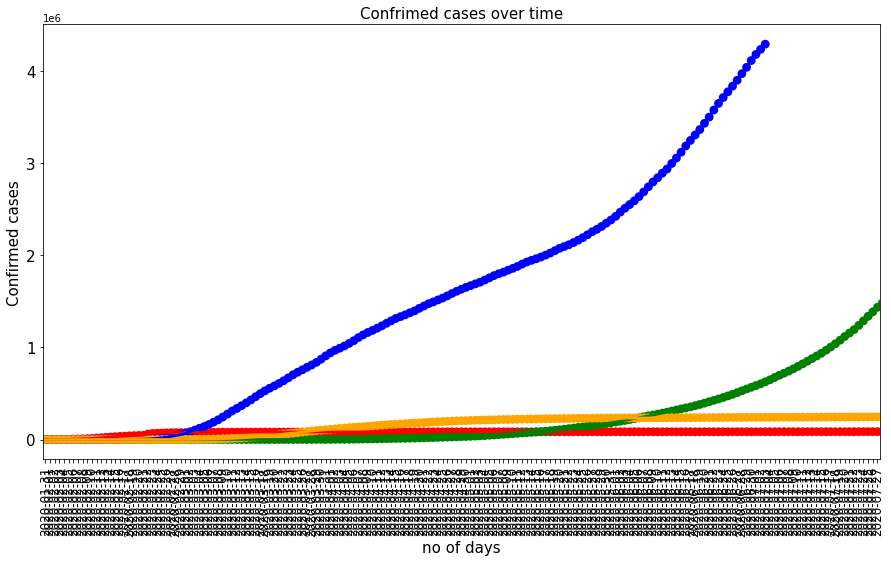

In [ ]:
#confirmed
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.confirmed,color="red")
sns.pointplot(india.date.dt.date,india.confirmed,color="green")
sns.pointplot(us.date.dt.date,us.confirmed,color="blue")
sns.pointplot(italy.date.dt.date,italy.confirmed,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("Confirmed cases",fontsize=15)
plt.title("Confrimed cases over time",fontsize=15)
plt.show()

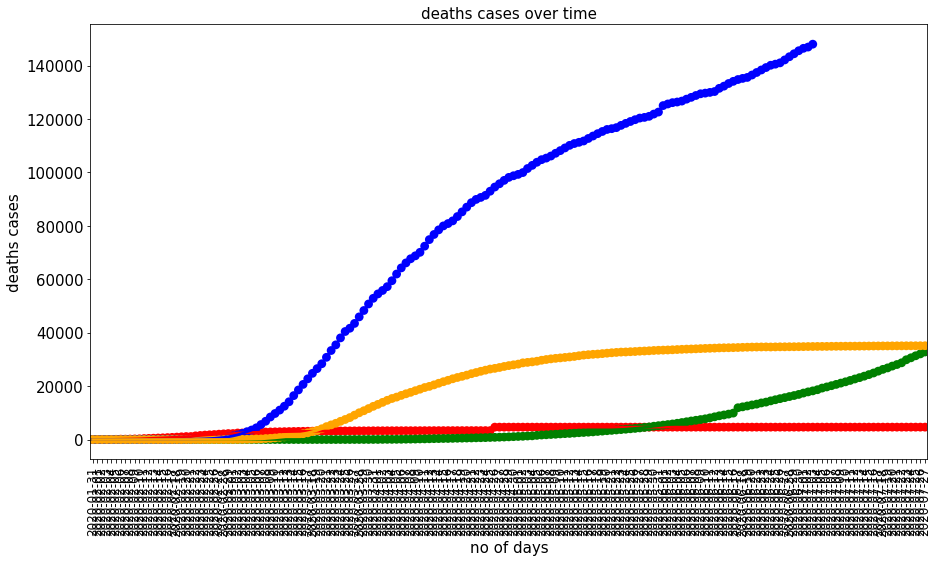

In [ ]:
#deaths
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.deaths,color="red")
sns.pointplot(india.date.dt.date,india.deaths,color="green")
sns.pointplot(us.date.dt.date,us.deaths,color="blue")
sns.pointplot(italy.date.dt.date,italy.deaths,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("deaths cases",fontsize=15)
plt.title("deaths cases over time",fontsize=15)
plt.show()

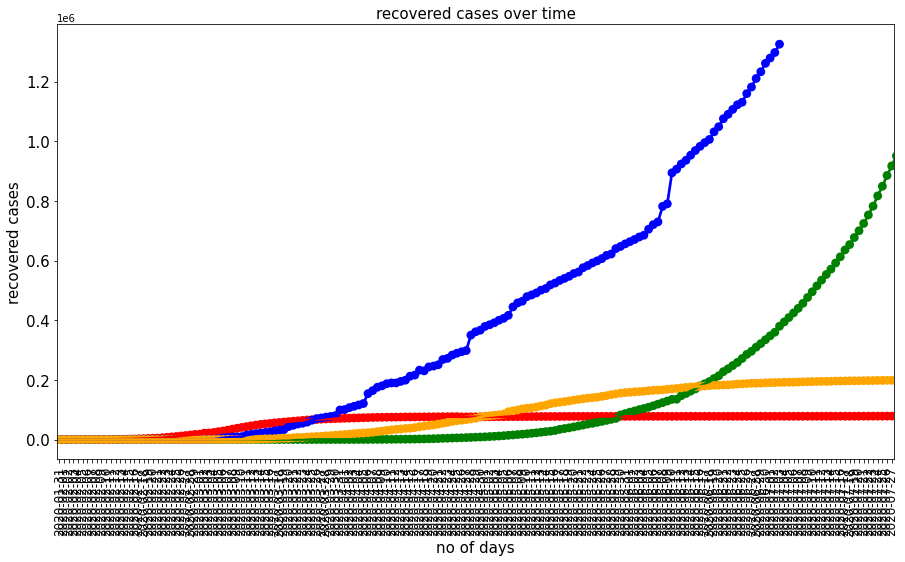

In [ ]:
#recovered
plt.figure(figsize=(15,8))
sns.pointplot(china.date.dt.date,china.recovered,color="red")
sns.pointplot(india.date.dt.date,india.recovered,color="green")
sns.pointplot(us.date.dt.date,us.recovered,color="blue")
sns.pointplot(italy.date.dt.date,italy.recovered,color="orange")
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=15)
plt.xlabel("no of days",fontsize=15)
plt.ylabel("recovered cases",fontsize=15)
plt.title("recovered cases over time",fontsize=15)
plt.show()

# Detailed Analysis Of covid cases in India

In [ ]:
df_india=pd.read_excel("covid_19_india.xlsx")

In [ ]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [ ]:
df_india["Total_cases"]=df_india["Total Confirmed cases (Indian National)"]+df_india["Total Confirmed cases ( Foreign National )"]

In [ ]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases
0,1,Andhra Pradesh,9,0,0,0,9
1,2,Bihar,3,0,0,1,3
2,3,Chhattisgarh,1,0,0,0,1
3,4,Delhi,30,1,6,1,31
4,5,Gujarat,32,1,0,1,33
5,6,Haryana,14,14,11,0,28
6,7,Himachal Pradesh,3,0,0,1,3
7,8,Karnataka,41,0,3,1,41
8,9,Kerala,101,8,4,0,109
9,10,Madhya Pradesh,9,0,0,0,9


In [ ]:
df_india["Total_cases"]=df_india["Total Confirmed cases (Indian National)"]+df_india["Total Confirmed cases ( Foreign National )"]

In [ ]:
df_india

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total_cases,Total_active
0,1,Andhra Pradesh,9,0,0,0,9,9
1,2,Bihar,3,0,0,1,3,2
2,3,Chhattisgarh,1,0,0,0,1,1
3,4,Delhi,30,1,6,1,31,24
4,5,Gujarat,32,1,0,1,33,32
5,6,Haryana,14,14,11,0,28,17
6,7,Himachal Pradesh,3,0,0,1,3,2
7,8,Karnataka,41,0,3,1,41,37
8,9,Kerala,101,8,4,0,109,105
9,10,Madhya Pradesh,9,0,0,0,9,9


In [ ]:
tot_cases=df_india.groupby("Name of State / UT")["Total_active"].sum().sort_values(ascending=False).to_frame()

In [ ]:
tot_cases

,Total active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [ ]:
tot_cases.style.background_gradient(cmap="hot_r")

,Total_active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


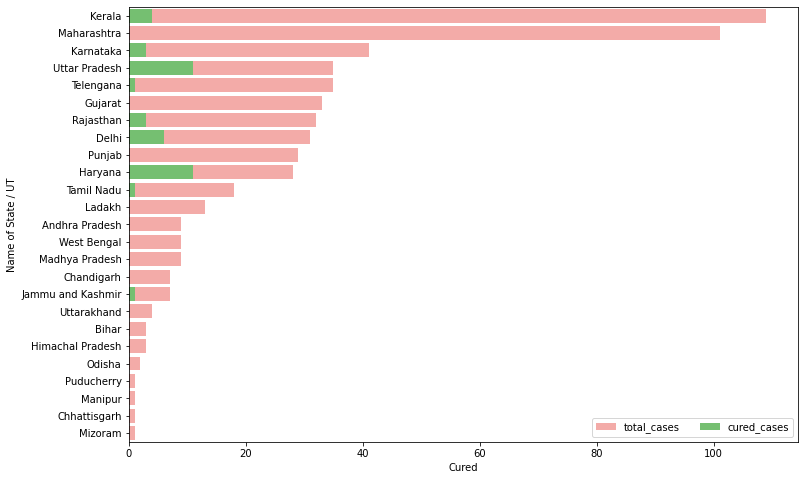

In [ ]:
#total_cases and cured
f,ax=plt.subplots(figsize=(12,8))
data=df_india[["Name of State / UT","Total_cases","Cured","Death"]]
data.sort_values("Total_cases",ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total_cases",y="Name of State / UT",data=data,label="total_cases",color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured",y="Name of State / UT",data=data,label="cured_cases",color="g")

ax.legend(ncol=2,loc="lower right",frameon=True)

In [ ]:
#perday Analysis
dbd_india=pd.read_excel("per_day_cases.xlsx")

In [ ]:
dbd_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             56 non-null     datetime64[ns]
 1   Total Cases                      56 non-null     int64         
 2   New Cases                        56 non-null     int64         
 3   Days after surpassing 100 cases  12 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 KB


In [ ]:
#trend of covid cases in india
fig=go.Figure()
fig.add_trace(go.Scatter(x=dbd_india["Date"],y=dbd_india["Total Cases"],mode="lines+markers",name="Total Cases"))
fig.update_layout(title_text="Trend of Coronavirus cases in India",plot_bgcolor="rgb(230,230,230)")
fig.show()

In [ ]:
#coronaviruscases in India on daily basis
fig=px.bar(dbd_india,x="Date",y="New Cases", barmode="group",height=400)
fig.update_layout(title_text="Coronaviruscases in India on daily basis",plot_bgcolor="rgb(230,230,230)")
fig.show()

# Insights into Covid cases Globally

In [ ]:
df_confirmed=pd.read_csv("time_series_covid19_confirmed_global.csv")
df_recovered=pd.read_csv("time_series_covid19_recovered_global.csv")
df_deaths=pd.read_csv("time_series_covid19_deaths_global.csv")

In [ ]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
df_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,Recovered,Canada,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,19.856270,102.495496,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_confirmed.rename(columns={"Country/Region":"Country"},inplace=True)
df_recovered.rename(columns={"Country/Region":"Country"},inplace=True)
df_deaths.rename(columns={"Country/Region":"Country"},inplace=True)

In [ ]:
df_india_cases=df.query('country== "India"').groupby("date")[["confirmed","deaths","recovered"]].sum().reset_index()
india_confirmed,india_deaths,india_recovered =df_india_cases[["date","confirmed"]],df_india_cases[["date","deaths"]],df_india_cases[["date","recovered"]]


In [ ]:
df_india_cases

,date,confirmed,deaths,recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
183,2020-07-23,1288108,30601,817209
184,2020-07-24,1337024,31358,849432
185,2020-07-25,1385635,32060,885573
186,2020-07-26,1435616,32771,917568


In [ ]:
df.groupby("date").sum().head()

,lat,long,confirmed,deaths,recovered,Active,active
date,,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510,510
2020-01-23,5594.20365,6140.869714,654,18,30,606,606
2020-01-24,5594.20365,6140.869714,941,26,36,879,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010,2010


In [ ]:
confirmed=df.groupby("date").sum()["confirmed"].reset_index()
deaths=df.groupby("date").sum()["deaths"].reset_index()
recovered=df.groupby("date").sum()["recovered"].reset_index()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed["date"],y=confirmed["confirmed"],mode="lines+markers",name="confirmed",line=dict(color="blue")))
fig.add_trace(go.Scatter(x=deaths["date"],y=deaths["deaths"],mode="lines+markers",name="deaths",line=dict(color="red")))
fig.add_trace(go.Scatter(x=recovered["date"],y=recovered["recovered"],mode="lines+markers",name="recovered",line=dict(color="green")))
fig.update_layout(title_text="World wide COVID_19 Cases",xaxis_tickfont_size=14,yaxis=dict(title="Number of cases"),plot_bgcolor="rgb(230,230,230)")
fig.show()